<a href="https://colab.research.google.com/github/dhguslee/leedo/blob/main/Machine%20Learning%20Code/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest
---

### I. Library

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### II. Data Preparation

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

print("shape : ", df.shape, "\n", "data : ", df.head())

shape :  (569, 31) 
 data :     mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


### III. Train data and Test data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.3,
                                                    stratify = cancer.target,   # train set과 test set의 class비율 동일
                                                    shuffle = True,
                                                    random_state = 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### IV. Model training

In [ ]:
RF = RandomForestClassifier(random_state = 1)

RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### V. Prediction

In [ ]:
pred = RF.predict(x_test)

pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

### VI. Socre (Accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

print("RF score : ", np.round(RF.score(x_test, y_test), 3))

print("Accuracy : ", np.round(accuracy_score(y_test, pred), 3))

RF score :  0.953
Accuracy :  0.953


### VII. Features Importance

특성 중요도 : 
 [0.07203729 0.01872365 0.06158579 0.03827855 0.00496785 0.00799047
 0.07201638 0.08682551 0.00431283 0.00569043 0.01366961 0.00484166
 0.0090134  0.03031816 0.00438121 0.00402359 0.00454619 0.00213269
 0.00203622 0.00488665 0.11008682 0.01456702 0.10220591 0.11948045
 0.00723039 0.0182622  0.03214933 0.12798068 0.01019065 0.00556841]


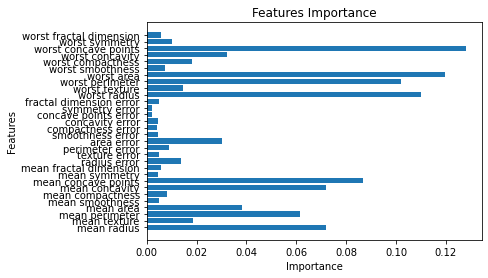

In [ ]:
print("특성 중요도 : \n", RF.feature_importances_)



plt.barh(range(cancer.data.shape[1]), RF.feature_importances_)
plt.yticks(range(cancer.data.shape[1]), cancer.feature_names)   # yticks() : 눈금 표시.
plt.title("Features Importance")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()